In [72]:
import csv
import os
import matplotlib.pyplot as plt

Messbereich 10cm - 80cm
70 - 10 = 60

In [73]:
60/20

3.0

In [74]:
cm = list(range(100,730,30))
print(cm)

[100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700]


In [75]:
values = []
with open("") as file:
    for

SyntaxError: invalid syntax (334976833.py, line 3)

In [ ]:
import numpy as np

In [ ]:


def regression(x, y):
    mx = np.mean(x)
    my = np.mean(y)
    n = np.size(x)
    val1 = np.sum(y*x) - n*my*my
    val2 = np.sum(x*x) - n*mx*my
    result = val1/val2
    return result


In [ ]:
messDaten = []
mittelwerte = []
for i in range(0,21):
    messDaten.append(np.genfromtxt(os.getcwd() + "/Messdaten/Messdistanz" + str(100 + 30*i) + "mm.csv", delimiter=";", skip_header=3, usecols=(1,)))
    mittelwerte.append(np.mean(messDaten[i][:-500]))

# print(messDaten[1][0:20])
print(mittelwerte)

19.311611739681222
-113.6135860328831


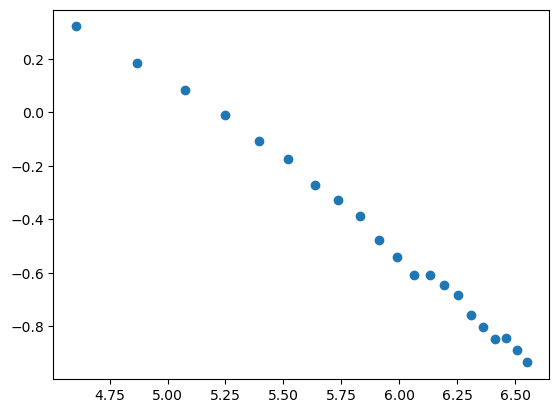

In [79]:
logx = [np.log(x) for x in cm]
logy = [np.log(m) for m in mittelwerte]
a = regression(logx, logy)
print(a)
b = np.mean(logy) - a * np.mean(logx)
print(b)
x = [a * x + b for x in cm]
y = [np.exp(b) * np.power(x, a) for x in cm]
# plt.plot(x,y)
plt.plot(logx , logy, 'o')
# plt.plot([0, reg])